In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

%matplotlib inline
import warnings; warnings.simplefilter('ignore')

In [2]:
rent_df=pd.read_csv("data/Rent_Data.csv")
rent_df.columns = ["Year", "Quarter", "LGA", "Dwelling Type", "Bedroom Number", 
                "First QNB", "Second QNB", "Third QNB", "NB Lodged", "TB Lodged", "Qtrly Median Change", 
                "Annly Median Change", "Qtrly NB", "Annly NB"]
rent_df.head(10)

,Year,Quarter,LGA,Dwelling Type,Bedroom Number,First QNB,Second QNB,Third QNB,NB Lodged,TB Lodged,Qtrly Median Change,Annly Median Change,Qtrly NB,Annly NB
0,2019,2,Albury,Total,Total,220,275,340,623.00,6095.00,-5.17%,1.85%,-16.93%,-5.03%
1,2019,2,Albury,Total,Bedsitter,-,-,-,-,-,-,-,-,-
2,2019,2,Albury,Total,1 Bedroom,165,178,200,50.00,496.00,1.43%,4.41%,-12.28%,11.11%
3,2019,2,Albury,Total,Not Specified,-,-,-,-,214.00,-,-,-,-
4,2019,2,Albury,Total,2 Bedrooms,190,235,265,255.00,2341.00,0.00%,2.17%,-5.56%,0.00%
5,2019,2,Albury,Total,3 Bedrooms,280,310,348,227.00,2141.00,-3.12%,6.90%,-22.53%,-9.56%
6,2019,2,Albury,Total,4 or more Bedrooms,360,400,430,83.00,893.00,0.00%,2.56%,-29.66%,-16.16%
7,2019,2,Albury,House,Total,275,320,370,312.00,2909.00,-3.03%,3.23%,-22.96%,-11.11%
8,2019,2,Albury,House,Bedsitter,-,-,-,-,-,-,-,-,-
9,2019,2,Albury,House,1 Bedroom,-,-,-,-,s,-,-,-,-


In [3]:
%run scripts/Rent_ntbk_util.py

Iteration 1, loss = 134.82671874
Iteration 2, loss = inf
Iteration 3, loss = inf
Iteration 4, loss = 20.45664048
Iteration 5, loss = 6.86626479
Iteration 6, loss = 2.83951366
Iteration 7, loss = 2.84981305
Iteration 8, loss = 2.85736337
Iteration 9, loss = 2.86248323
Iteration 10, loss = 2.86576958
Iteration 11, loss = 2.86734495
Iteration 12, loss = 2.86659652
Iteration 13, loss = 2.86647471
Iteration 14, loss = 2.86466929
Iteration 15, loss = 2.86205153
Iteration 16, loss = 2.85892640
Iteration 17, loss = 2.85575524
Training loss did not improve more than tol=0.000000 for 10 consecutive epochs. Stopping.


#### Data Cleaning
* replaced "-" with NaN
* convert numberical columns into float
* get the minimum non 0 value of __First QNB, Second QNB, and Third QNB__
* for replace NaN values with 0, for rows with 9 columns with NaN values, this means that the row is totally empty/blank
* replace the rest of NaN in __First QNB, Second QNB, and Third QNB__ with minimum value of column minus 1, to distinguish cells that have NaN value that is not an empty row. And for these cells to have values closer to the minimum but is less than the minimum value 

* __NB Lodged and TB Lodged__ - replaced NaN with 0 and s with minim value of column divided by 2. Due to s means really small value
* remove "%" in __Qtrly Median Change, Annly Median Change, Qtrly NB, Annly NB__
* convert numerical columns to int except for __Qtrly Median Change, Annly Median Change, Qtrly NB, Annly NB__
* add __Mean QNB__ column, which is the average of First QNB, Second QNB, and Third QNB.

In [4]:
rent_df.head(10)

,Year,Quarter,LGA,Dwelling Type,Bedroom Number,First QNB,Second QNB,Third QNB,NB Lodged,TB Lodged,Qtrly Median Change,Annly Median Change,Qtrly NB,Annly NB,Mean QNB
0,2019,2,Albury,Total,Total,220,275,340,311,3047,5.0,1.0,16.0,5.0,278
1,2019,2,Albury,Total,Bedsitter,0,0,0,0,0,0.0,0.0,0.0,0.0,0
2,2019,2,Albury,Total,1 Bedroom,165,178,200,25,248,1.0,4.0,12.0,11.0,181
3,2019,2,Albury,Total,Not Specified,59,59,59,0,107,0.0,0.0,0.0,0.0,59
4,2019,2,Albury,Total,2 Bedrooms,190,235,265,127,1170,0.0,2.0,5.0,0.0,230
5,2019,2,Albury,Total,3 Bedrooms,280,310,348,113,1070,3.0,6.0,22.0,9.0,312
6,2019,2,Albury,Total,4 or more Bedrooms,360,400,430,41,446,0.0,2.0,29.0,16.0,396
7,2019,2,Albury,House,Total,275,320,370,156,1454,3.0,3.0,22.0,11.0,321
8,2019,2,Albury,House,Bedsitter,0,0,0,0,0,0.0,0.0,0.0,0.0,0
9,2019,2,Albury,House,1 Bedroom,59,59,59,0,0,0.0,0.0,0.0,0.0,59


#### Top LGAs with highest Rent price
* new DataFrame was created to show the behaviour of the Renting Price per Quarter of the TOP LGA
* LGAs were ranked based on the Renting Price, and the top 10 LGAs were graphed to show the increase and decrese in Renting Price per quarter
* in the new DataFrame __all_mean_df__ 2015.Q1 to 2017.Q2 columns were dropped due to it's big difference with 2017.Q3 to 2019.Q2 data.

(array([0., 1., 2., 3., 4., 5., 6., 7.]),
 <a list of 8 Text xticklabel objects>)

<Figure size 1080x720 with 0 Axes>

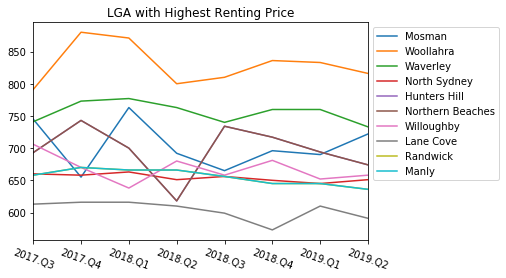

In [5]:
plt.figure(figsize=(15,10)) 
top_mean_df.transpose().plot()
plt.title('LGA with Highest Renting Price')
plt.legend(bbox_to_anchor=(1, 1), loc=2)
plt.xticks(rotation=-20)

#### Get all LGAs and Mean QNB per Quarter
* new DataFrame was created to show the behaviour of the Renting Price per Quarter for each LGA
* new DataFrame will be used for Training and Testing of data, since the goal of this project is to predict the Renting Price of each LGA for the next quarter. 

In [6]:
all_mean_df.head(10)

,LGA,2017.Q3,2017.Q4,2018.Q1,2018.Q2,2018.Q3,2018.Q4,2019.Q1,2019.Q2
LGA,,,,,,,,,
Albury,Albury,268,280,283,273,280,280,291,278
Armidale Regional,Armidale Regional,268,280,283,273,280,280,291,278
Ballina,Ballina,268,280,283,273,280,280,291,278
Balranald,Balranald,268,280,283,273,280,280,291,278
Bathurst Regional,Bathurst Regional,268,280,283,273,280,280,291,278
Bega Valley,Bega Valley,268,280,283,273,280,280,291,278
Bellingen,Bellingen,268,280,283,273,280,280,291,278
Berrigan,Berrigan,268,280,283,273,280,280,291,278
Bland,Bland,268,280,283,273,280,280,291,278


#### Get correlation of all LGAs and Year/Quarter prices
* using the new DataFrame __all_mean_df__, the correlation of each column is high

In [7]:
%run scripts/PearsonValue.py

<Figure size 432x288 with 0 Axes>

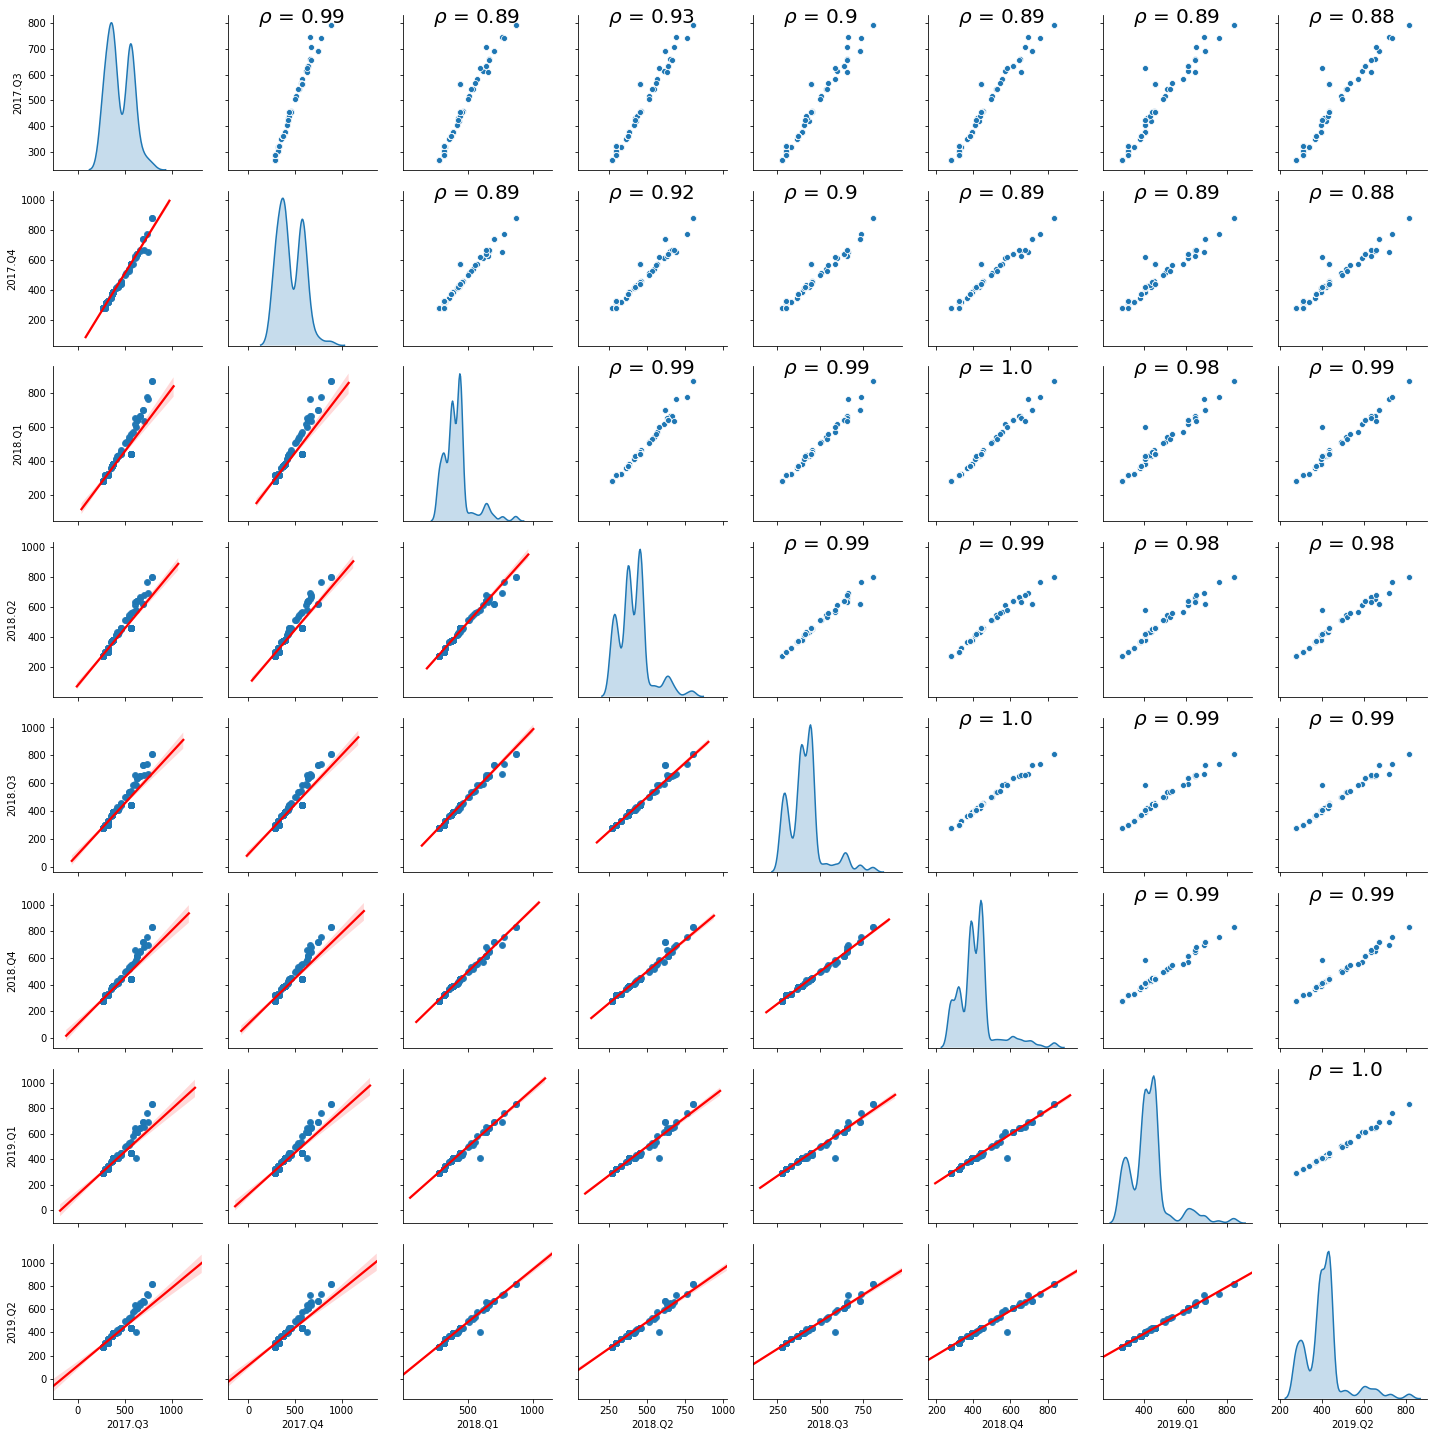

In [8]:
g = sns.pairplot(all_mean_df,
             vars = ['2017.Q3', '2017.Q4', '2018.Q1', '2018.Q2', '2018.Q3', '2018.Q4',
                      '2019.Q1', '2019.Q2'],
             palette = 'husl',
             diag_kind = 'kde',
             diag_kws=dict(shade=True))

g.map_upper(corr)
g.map_lower(sns.regplot, line_kws = {'color':'red'})
plt.show()

#### Apply Models and see accruacy score
* Decision Tree
* __Random Forest__ -  gives the best score out of all the models used
* SVM
* __Neural Network__ - give the worst score out of all the models

##### Basis of a Good Model
* __Root Mean Sqaured Error__ the lower the error value (absolute value) the better the model
* __R-Sqaured__ the higher the value (absolute value) the better the model
* __Accuracy Score__ should be closer to 1.00

##### Analysis
* As seen in the table and plots, __Random Forest__ gives the best results. It's RMSE for both train and test data are the smallest, it has better R-Squared value for testing data compared to Decision Tree, has better Accuracy Score of test data, and both R-Squared and Accuracy Score for training data are high and close to 1.00.

In [9]:
stats_df

,RMSE Train,RMSE Test,R-Squared Train,R-Squared Test,Accuracy Score Train,Accuracy Score Test
Model,,,,,,
Decision Tree,0.000000,129.763636,1.000000,0.984338,1.000000,0.818182
Random Forest,44.967031,94.096364,0.995592,0.988643,0.995592,0.988643
SVM,267.359375,751.436364,0.973792,0.909306,0.843750,0.636364
Neural Network,10878.742188,8734.054545,-0.066384,-0.054152,0.343750,0.254545


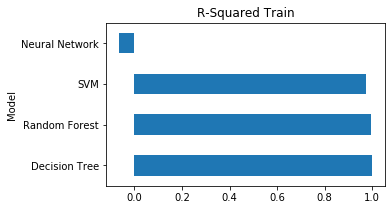

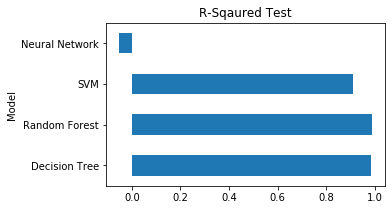

In [10]:
plt.figure(figsize=(5,3))
stats_df['R-Squared Train'].plot(kind = 'barh', 
           title='R-Squared Train', 
           legend = False)

plt.figure(figsize=(5,3))
stats_df['R-Squared Test'].plot(kind = 'barh', 
           title='R-Sqaured Test', 
           legend = False)

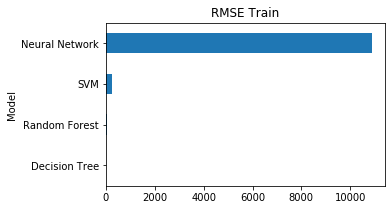

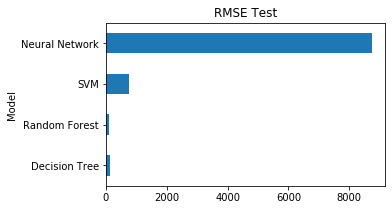

In [11]:
plt.figure(figsize=(5,3))
stats_df['RMSE Train'].plot(kind = 'barh', 
           title='RMSE Train', 
           legend = False)

plt.figure(figsize=(5,3))
stats_df['RMSE Test'].plot(kind = 'barh', 
           title='RMSE Test', 
           legend = False)

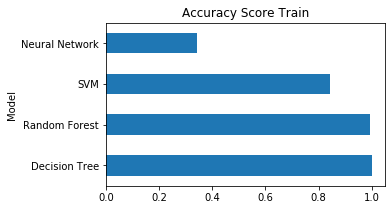

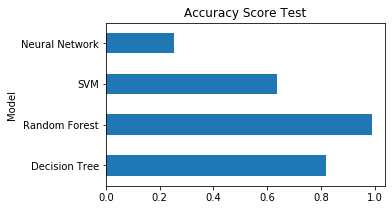

In [12]:
plt.figure(figsize=(5,3))
stats_df['Accuracy Score Train'].plot(kind = 'barh', 
           title='Accuracy Score Train', 
           legend = False)

plt.figure(figsize=(5,3))
stats_df['Accuracy Score Test'].plot(kind = 'barh', 
           title='Accuracy Score Test', 
           legend = False)

#### Top LGAs according to New Signed Bonds
* LGAs with the highest New Bond Lodged were graphed as well as the LGAs' Renting Price to show the behaviour of both graphs.
* the correlation of New Bond Lodged and Renting Price was also also graphed

##### Analysis
* with the illustrated graph and value of correlation between Renting Price and New Bond Lodged, it is seen that Renting Price doesn't greatly affect the number Bond Lodged. The number of Bond Lodged maybe affected by the other factors that are not included in this dataset.

(array([0., 1., 2., 3., 4., 5., 6., 7.]),
 <a list of 8 Text xticklabel objects>)

<Figure size 1080x720 with 0 Axes>

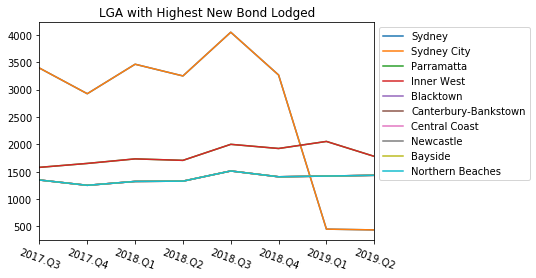

<Figure size 1080x720 with 0 Axes>

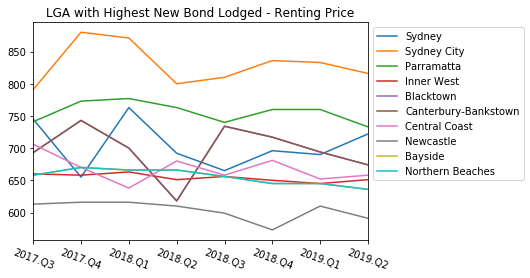

In [13]:
## plot New Bond Lodged
plt.figure(figsize=(15,10)) 
top_NB_df.transpose().plot()
plt.title('LGA with Highest New Bond Lodged')
plt.legend(bbox_to_anchor=(1, 1), loc=2)
plt.xticks(rotation=-20)

## Renting Price Mean of New Bond Lodge LGAs
plt.figure(figsize=(15,10))
top_nbmean_df.transpose().plot()
plt.title('LGA with Highest New Bond Lodged - Renting Price')
plt.legend(bbox_to_anchor=(1, 1), loc=2)
plt.xticks(rotation=-20)

In [14]:
top_NB_df

,2017.Q3,2017.Q4,2018.Q1,2018.Q2,2018.Q3,2018.Q4,2019.Q1,2019.Q2
LGA,,,,,,,,
Sydney,3394,2925,3464,3250,4049,3267,450,436
Sydney City,3394,2925,3464,3250,4049,3267,450,436
Parramatta,1579,1651,1734,1707,2000,1924,2053,1780
Inner West,1579,1651,1734,1707,2000,1924,2053,1780
Blacktown,1348,1251,1322,1327,1513,1407,1420,1434
Canterbury-Bankstown,1348,1251,1322,1327,1513,1407,1420,1434
Central Coast,1348,1251,1322,1327,1513,1407,1420,1434
Newcastle,1348,1251,1322,1327,1513,1407,1420,1434
Bayside,1348,1251,1322,1327,1513,1407,1420,1434


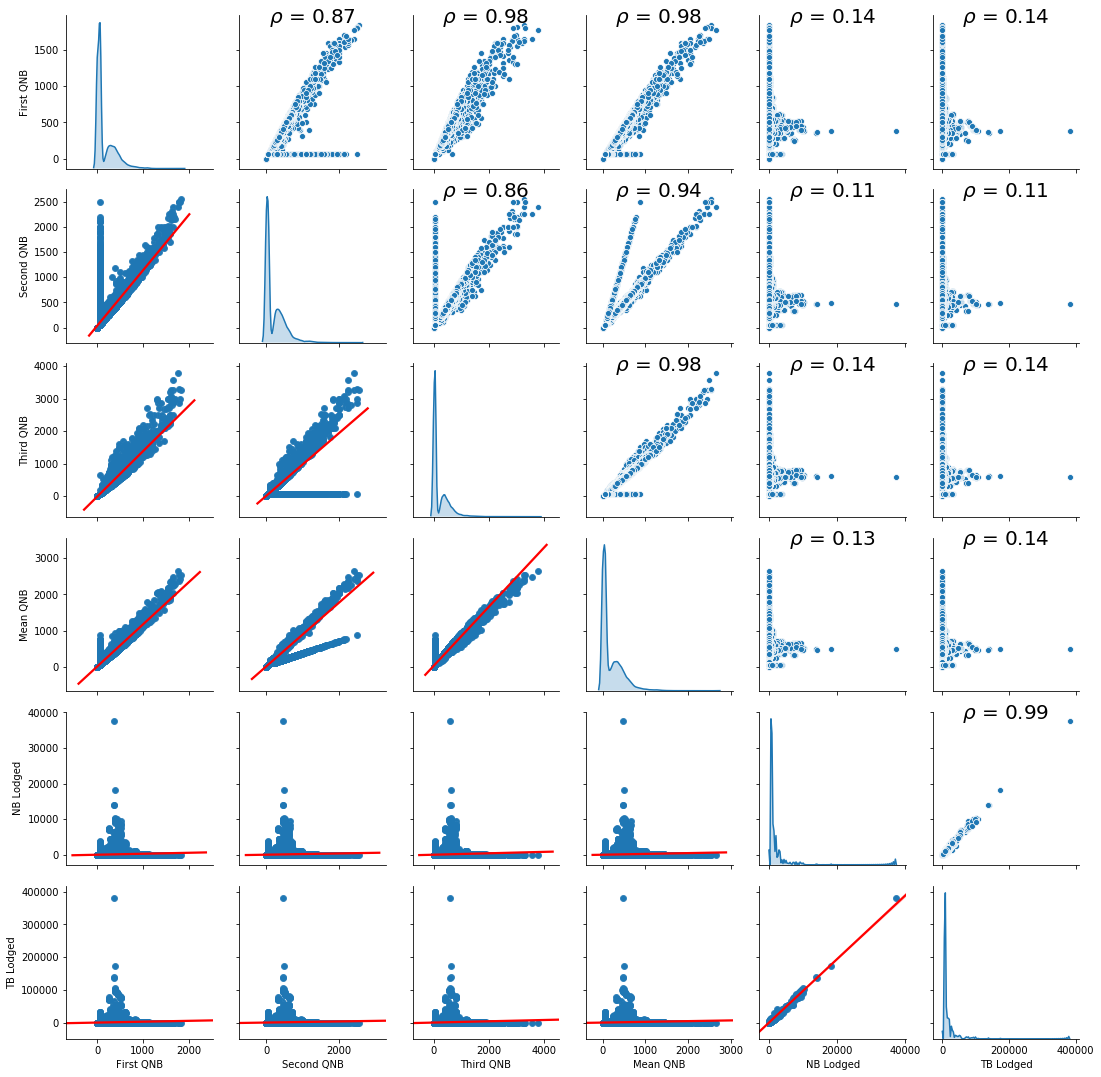

In [15]:
g = sns.pairplot(rent_df,
             vars = ['First QNB', 'Second QNB', 'Third QNB', 'Mean QNB', 'NB Lodged', 'TB Lodged'],
             palette = 'husl',
             diag_kind = 'kde',
             diag_kws=dict(shade=True))

g.map_upper(corr)
g.map_lower(sns.regplot, line_kws = {'color':'red'})
plt.show()

#### Dwelling Type Most People Rent
* most people rent Flat/Unit compared to other Dwelling Types
* most people prefer 2 Bedroom Flat/Unit, which can be seen in the graph

Text(0.5, 1.0, 'Total Bond Lodged per Year')

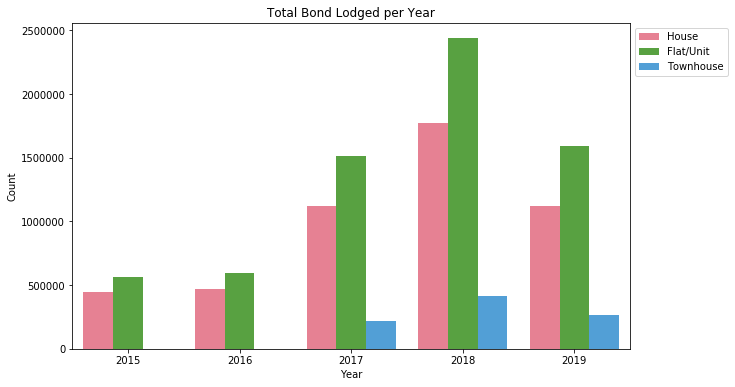

In [16]:
## Total Bond Lodged per year per dwelling type
plt.figure(figsize=(10,6)) 
 
sns.barplot(x = 'Year', 
            y = 'Count', 
            data = bond_count_df, 
            hue = 'Dwelling Type', 
            palette = 'husl',
            ci = None)
 
plt.legend(bbox_to_anchor=(1, 1), loc=2)
plt.title('Total Bond Lodged per Year')

Text(0.5, 1.0, 'Bond Lodged per Year')

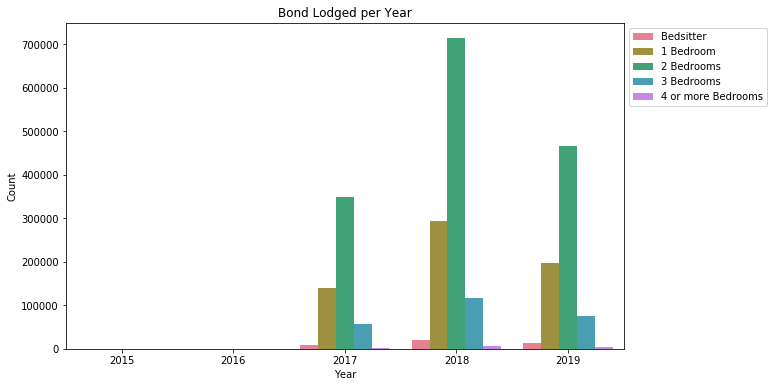

In [17]:
## FLAT/UNIT: plot total bond lodged per year per number of bedroom
plt.figure(figsize=(10,6)) 
 
sns.barplot(x = 'Year', 
            y = 'Count', 
            data = flatbond_count_df, 
            hue = 'Number of Bedrooms', 
            palette = 'husl',
            ci = None)
 
plt.legend(bbox_to_anchor=(1, 1), loc=2)
plt.title('Bond Lodged per Year')

#### Apply Models and see accuracy score for rent_df
* Decision Tree
* Random Forest
* SVM
* Neural Network

##### Details
* columns used in the first train test data are the columns with the highest correlation value with __Mean QNB__ column which is the predicted column.
* columns used in the second train test data are the top 7 featured selected columns using _ExtraTreesClassifier_
* the results of the two train test data were compared, to see if it gives the same results eventhough different columns were used for the prediction

##### Analysis
* for the rent_df dataframe, RandomForest still gives the best results for both datasets. Both having the smallest value of RMSE, better R-Sqaured value next to Decision Tree, and highest accuracy score.

In [18]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(rent_df['LGA'].unique())
rent_df['LGA']=le.transform(rent_df['LGA']) 

le.fit(rent_df['Dwelling Type'].unique())
rent_df['Dwelling Type']=le.transform(rent_df['Dwelling Type']) 

le.fit(['Total', 'Bedsitter', '1 Bedroom', '2 Bedrooms', '3 Bedrooms', '4 or more Bedrooms', 'Not Specified'])
rent_df['Bedroom Number']=le.transform(rent_df['Bedroom Number']) 

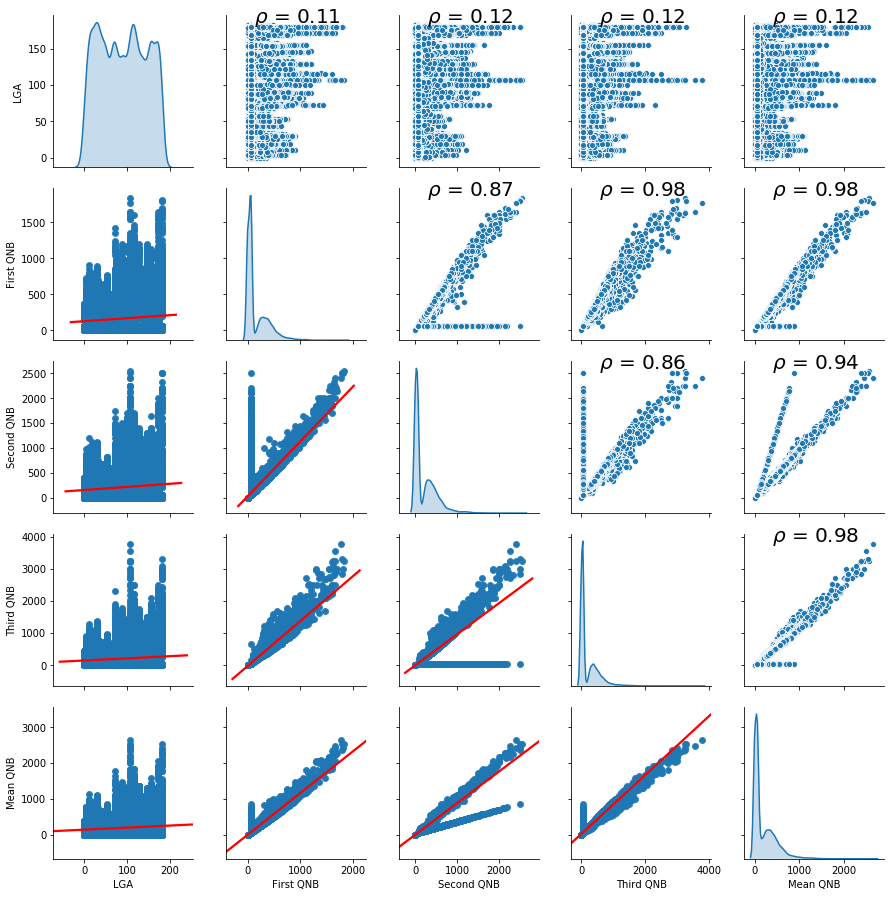

In [19]:
g = sns.pairplot(rent_df,
             vars = ['LGA', 'First QNB', 'Second QNB', 'Third QNB', 'Mean QNB'],
             palette = 'husl',
             diag_kind = 'kde',
             diag_kws=dict(shade=True))

g.map_upper(corr)
g.map_lower(sns.regplot, line_kws = {'color':'red'})
plt.show()

In [31]:
from sklearn.model_selection import train_test_split

cols = np.array(['LGA', 'First QNB', 'Second QNB', 'Third QNB'])
X = rent_df[cols]
y = rent_df['Mean QNB']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size = 0.3)

In [27]:
model_list = [DecisionTreeClassifier(random_state=0),
              RandomForestRegressor(random_state=1),
              svm.SVC(gamma='scale'),
              MLPClassifier(hidden_layer_sizes=(100,100,100), max_iter=20, alpha=0.01, 
                            solver='sgd', verbose=10,  random_state=21,tol=0.000000001)]
model_name = ['Decision Tree', 'Random Forest', 'SVM', 'Neural Network']

stats = []

for x in range(4):
    model = model_list[x]
    model.fit(X_train, y_train)
    predicted = model.predict(X_train)
    MSE_train = mean_squared_error(y_train, predicted)
    R2_train = r2_score(y_train, predicted)
    Accuracy_train = model.score(X_train, y_train)
    predicted = model.predict(X_test)
    MSE_test = mean_squared_error(y_test, predicted)
    R2_test = r2_score(y_test, predicted)
    Accuracy_test = model.score(X_test, y_test)
    model = model_name[x]
    stats.append((model, MSE_train, MSE_test, R2_train, R2_test, Accuracy_train, Accuracy_test))
    stats_df = pd.DataFrame.from_records(stats)
    stats_df.columns = ['Model', 'RMSE Train', 'RMSE Test', 'R-Squared Train', 'R-Squared Test', 
                        'Accuracy Score Train', 'Accuracy Score Test']
    stats_df.index = stats_df['Model']
    stats_df = stats_df.drop('Model',
                axis = 1)

stats_df

Iteration 1, loss = 3.96704670
Iteration 2, loss = 3.24068672
Iteration 3, loss = 3.13592825
Iteration 4, loss = 3.07277706
Iteration 5, loss = 3.02542699
Iteration 6, loss = 2.95841420
Iteration 7, loss = 2.90933126
Iteration 8, loss = 2.85642807
Iteration 9, loss = 2.81531150
Iteration 10, loss = 2.78995777
Iteration 11, loss = 2.75493521
Iteration 12, loss = 2.73969511
Iteration 13, loss = 2.72074660
Iteration 14, loss = 2.71919102
Iteration 15, loss = 2.68670556
Iteration 16, loss = 2.67580111
Iteration 17, loss = 2.66443433
Iteration 18, loss = 2.65142536
Iteration 19, loss = 2.63888777
Iteration 20, loss = 2.62423742


,RMSE Train,RMSE Test,R-Squared Train,R-Squared Test,Accuracy Score Train,Accuracy Score Test
Model,,,,,,
Decision Tree,0.000000,68.924068,1.000000,0.998920,1.000000,0.768748
Random Forest,3.467140,17.851282,0.999946,0.999720,0.999946,0.999720
SVM,159.329272,162.072320,0.997517,0.997460,0.598337,0.600000
Neural Network,28191.373561,28720.521790,0.560640,0.549856,0.575385,0.580997


Text(0.5, 0, 'Importance')

<Figure size 720x432 with 0 Axes>

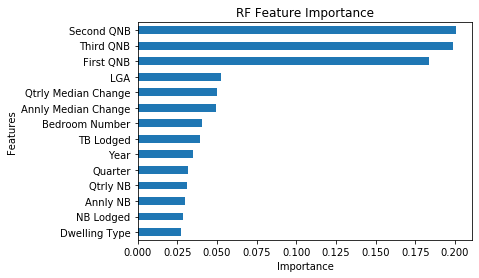

In [22]:
from sklearn.ensemble import ExtraTreesClassifier

forest = ExtraTreesClassifier(n_estimators=20,
                              random_state=0)
all_cols = ["Year", "Quarter", "LGA", "Dwelling Type", "Bedroom Number", 
                "First QNB", "Second QNB", "Third QNB", "NB Lodged", "TB Lodged", "Qtrly Median Change", 
                "Annly Median Change", "Qtrly NB", "Annly NB"]
X = rent_df[all_cols]
y = rent_df['Mean QNB']

forest.fit(X, y)
importances = forest.feature_importances_
RF_data = {'Features': all_cols, 'Importance': importances}
RF_df = pd.DataFrame(RF_data)
RF_df = RF_df.sort_values(by = ['Importance'])

plt.figure(figsize=(10,6))
RF_df.plot(kind = 'barh', 
           x = 'Features', 
           y = 'Importance', 
           title='RF Feature Importance', 
           legend = False)
plt.xlabel('Importance')

In [33]:
from sklearn.model_selection import train_test_split

cols = np.array(['LGA', 'First QNB', 'Second QNB', 'Third QNB', 'Qtrly Median Change', 'Annly Median Change', 'Bedroom Number'])
X = rent_df[cols]
y = rent_df['Mean QNB']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size = 0.3)

In [35]:
model_list = [DecisionTreeClassifier(random_state=0),
              RandomForestRegressor(random_state=1),
              svm.SVC(gamma='scale'),
              MLPClassifier(hidden_layer_sizes=(100,100,100), max_iter=20, alpha=0.01, 
                            solver='sgd', verbose=10,  random_state=21,tol=0.000000001)]
model_name = ['Decision Tree', 'Random Forest', 'SVM', 'Neural Network']

stats = []

for x in range(4):
    model = model_list[x]
    model.fit(X_train, y_train)
    predicted = model.predict(X_train)
    MSE_train = mean_squared_error(y_train, predicted)
    R2_train = r2_score(y_train, predicted)
    Accuracy_train = model.score(X_train, y_train)
    predicted = model.predict(X_test)
    MSE_test = mean_squared_error(y_test, predicted)
    R2_test = r2_score(y_test, predicted)
    Accuracy_test = model.score(X_test, y_test)
    model = model_name[x]
    stats.append((model, MSE_train, MSE_test, R2_train, R2_test, Accuracy_train, Accuracy_test))
    stats_df = pd.DataFrame.from_records(stats)
    stats_df.columns = ['Model', 'RMSE Train', 'RMSE Test', 'R-Squared Train', 'R-Squared Test', 
                        'Accuracy Score Train', 'Accuracy Score Test']
    stats_df.index = stats_df['Model']
    stats_df = stats_df.drop('Model',
                axis = 1)

stats_df

Iteration 1, loss = 4.10732594
Iteration 2, loss = 3.18062905
Iteration 3, loss = 3.07283666
Iteration 4, loss = 3.02309528
Iteration 5, loss = 2.97187437
Iteration 6, loss = 2.93756831
Iteration 7, loss = 2.89095719
Iteration 8, loss = 2.85023138
Iteration 9, loss = 2.81086460
Iteration 10, loss = 2.77059307
Iteration 11, loss = 2.74080693
Iteration 12, loss = 2.71798074
Iteration 13, loss = 2.69678149
Iteration 14, loss = 2.67283293
Iteration 15, loss = 2.65820026
Iteration 16, loss = 2.64232019
Iteration 17, loss = 2.62819188
Iteration 18, loss = 2.62166041
Iteration 19, loss = 2.60672978
Iteration 20, loss = 2.59078050


,RMSE Train,RMSE Test,R-Squared Train,R-Squared Test,Accuracy Score Train,Accuracy Score Test
Model,,,,,,
Decision Tree,0.000000,91.677896,1.000000,0.998563,1.000000,0.744170
Random Forest,4.771517,19.900395,0.999926,0.999688,0.999926,0.999688
SVM,209.133035,210.140400,0.996741,0.996706,0.594333,0.596545
Neural Network,26714.981860,26970.958225,0.583649,0.577277,0.578582,0.584688
